<a href="https://colab.research.google.com/github/BrajanNieto/stats-prob-py/blob/main/02.ProyectoEstadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Maestría de Ciencia de Datos e Inteligencia Artificial
### Estadística y Probabilidades


**Autores:**  

Rodrigo Guedes del Pozo

Sebastian Lopez Medina

Brajan Esteban Nieto Espinoza  

Mateo Tapia



<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

# 1) Lectura de los datos

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('info_clientes_libres_proyecto.xlsx', sheet_name='INFO_CLIENTES')
df.rename(columns={
    'MARGEN_COMERCIAL (USD)': 'MARGEN_COMERCIAL',
    'ENERGÍA (MW.h)': 'ENERGIA_MWh',
    'POTENCIA_CONTRATADA (MW)': 'POTENCIA_MW'
}, inplace=True)

df.head(15)

,RUC CLIENTE,CLIENTE / CENTRAL GENERACIÓN,MARGEN_COMERCIAL,ENERGIA_MWh,POTENCIA_MW
0,20100147514,SOUTHERN PERU CC,"3,171,115.770","197,393.800",200.000
1,20330262428,MINERA ANTAMINA,"2,666,303.390","86,785.250",340.000
2,20261677955,NEXA RESOURCES CAJAMARQUILLA S.A.,"995,941.290","120,093.620",120.000
3,20137913250,ANGLO AMERICAN QUELLAVECO S.A.,"766,555.890","104,078.090",187.400
4,20538428524,MINERA LAS BAMBAS S.A.,"697,948.780","105,836.220",100.000
5,20506675457,MINERA CHINALCO PERÚ S.A.,"694,033.470","102,544.020",66.000
6,20330791501,QUIMPAC S.A.,"610,163.470","45,705.650",87.350
7,20383045267,MINERA VOLCAN,"582,902.610","35,446.330",60.000
8,20100079501,MINERA BUENAVENTURA,"567,575.170","22,055.560",33.700
9,20370146994,ACEROS AREQUIPA,"513,092.780","57,307.650",28.060


# 2) Análisis estadístico descriptivo y visual

In [23]:
numeric_cols = ['MARGEN_COMERCIAL', 'ENERGIA_MWh', 'POTENCIA_MW']
# Resumen estadístico
estadisticas = df[numeric_cols].describe()
print("Descripción:")
pd.set_option('display.float_format', '{:,.3f}'.format)
print(estadisticas)


Descripción:
       MARGEN_COMERCIAL  ENERGIA_MWh  POTENCIA_MW
count         1,187.000    1,187.000    1,187.000
mean         16,324.316    2,184.872        5.506
std         137,665.785   13,574.391       24.112
min        -650,761.330        0.160        0.010
25%             431.140       70.850        0.160
50%             967.400      141.860        0.460
75%           2,894.540      463.225        1.685
max       3,171,115.770  305,494.000      540.000


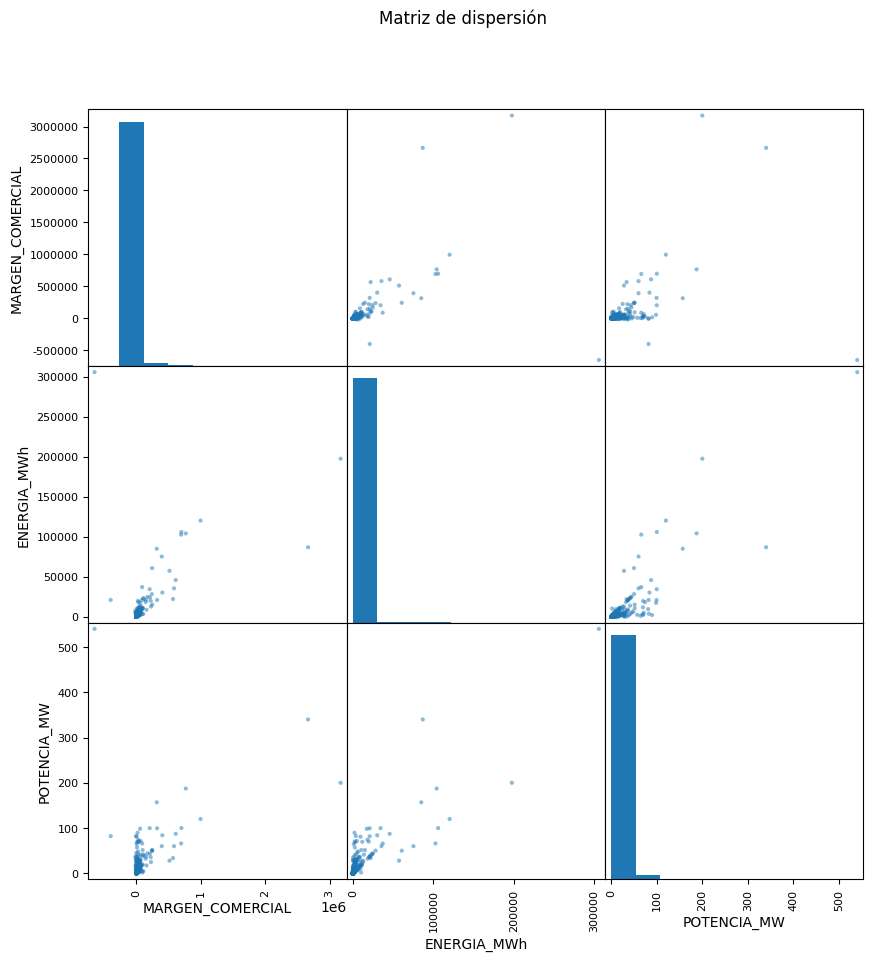

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_cols], figsize=(10, 10), diagonal='hist')
plt.suptitle('Matriz de dispersión')
plt.show()


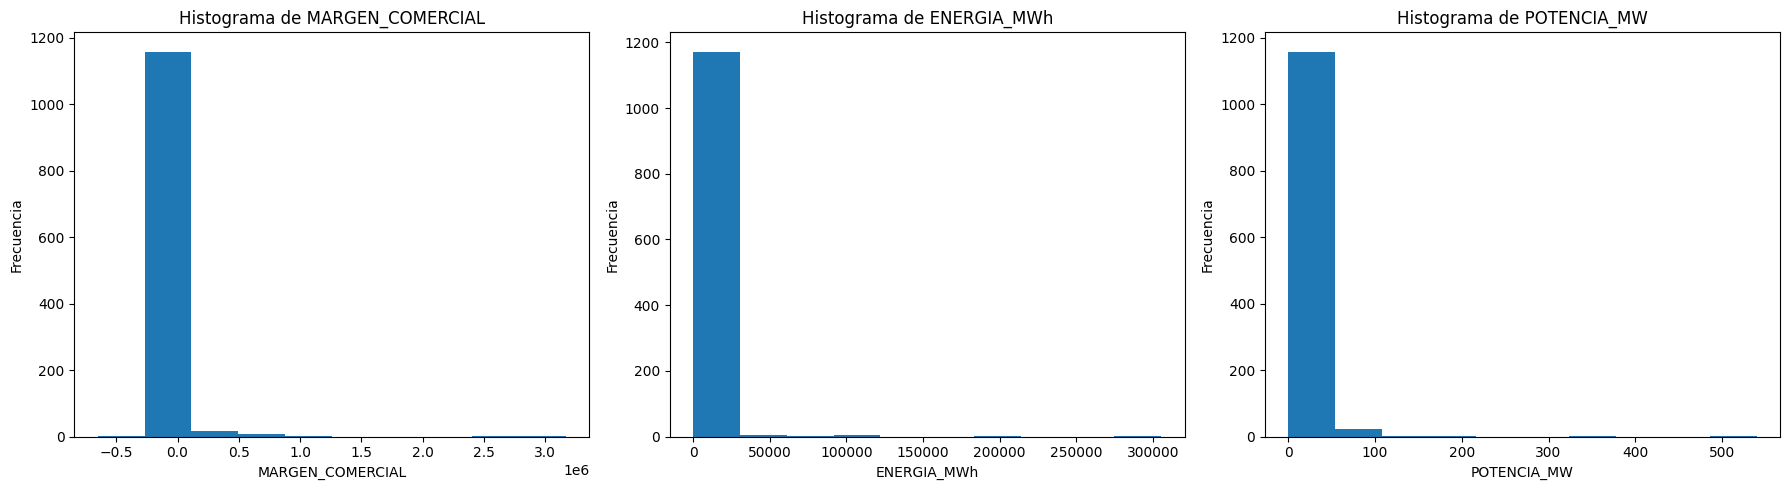

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

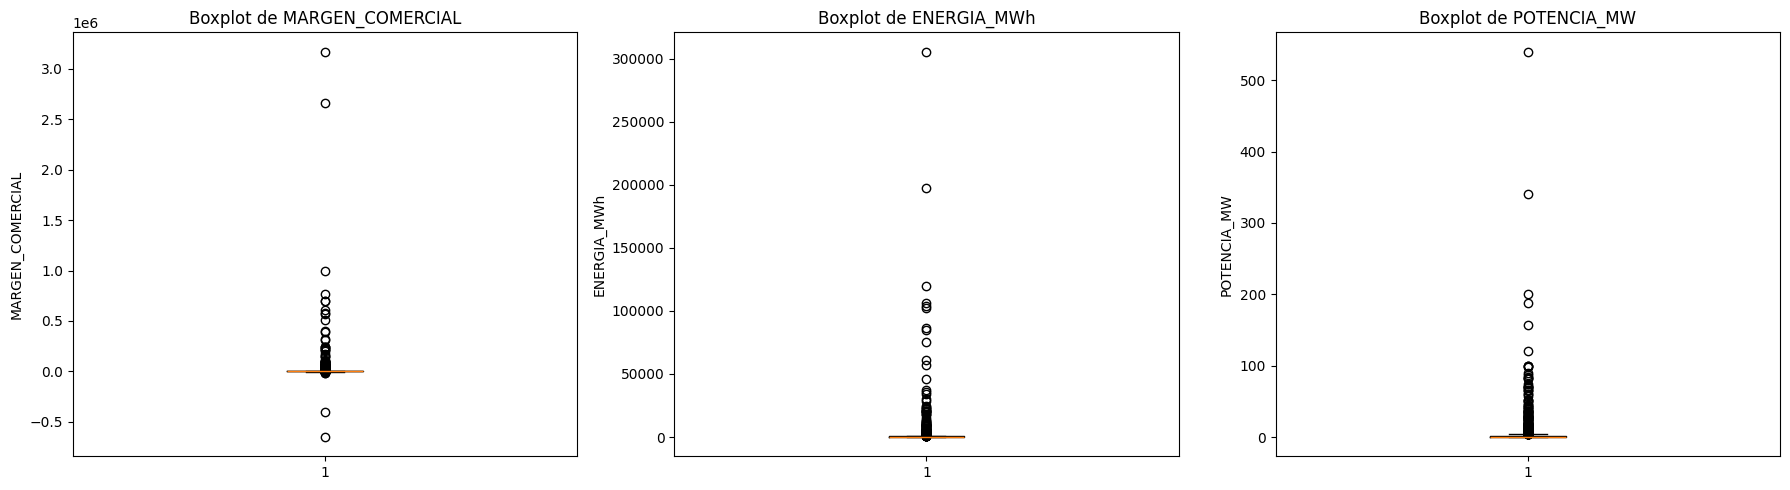

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


<ipython-input-27-db33da8442ac>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col].dropna() for col in numeric_cols], labels=numeric_cols)


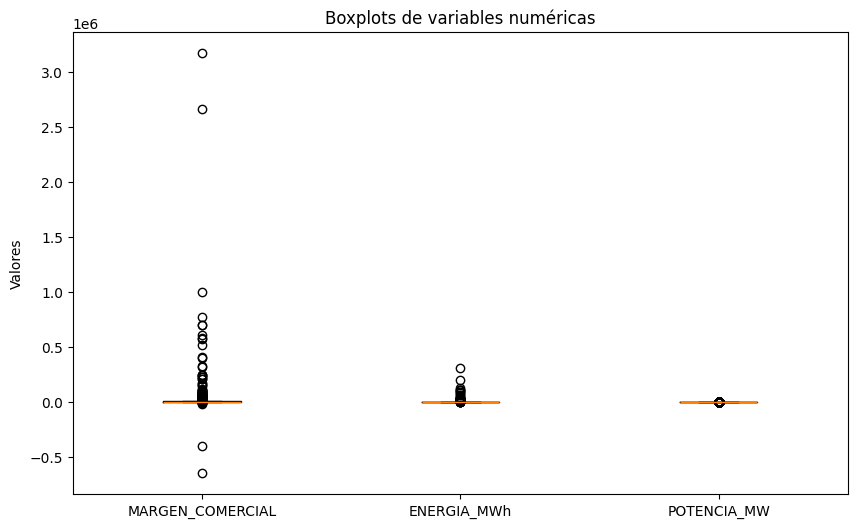

In [27]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[col].dropna() for col in numeric_cols], labels=numeric_cols)
plt.title('Boxplots de variables numéricas')
plt.ylabel('Valores')
plt.show()

Matriz de correlación (numérica):
                  MARGEN_COMERCIAL  ENERGIA_MWh  POTENCIA_MW
MARGEN_COMERCIAL             1.000        0.544        0.477
ENERGIA_MWh                  0.544        1.000        0.872
POTENCIA_MW                  0.477        0.872        1.000


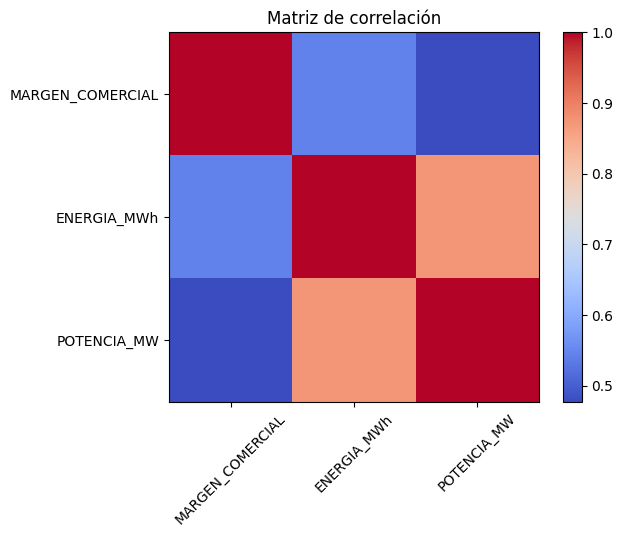

In [28]:
import numpy as np

corr_matrix = df[numeric_cols].corr(method='pearson')
print("Matriz de correlación (numérica):")
print(corr_matrix)

# Heatmap
plt.figure()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.title('Matriz de correlación')
plt.show()


# 3) Definición de Heuristicas y Parametros

In [40]:
# Convertimos los datos a listas
margen = df['MARGEN_COMERCIAL'].tolist()
potencia = df['POTENCIA_MW'].tolist()
clientes = df['RUC CLIENTE'].tolist()
CAPACIDAD = 500  # MW máximo

In [ ]:
def brute_force_knapsack(margen, potencia, capacidad):
    """
    Algoritmo de fuerza bruta para el problema Knapsack.

    Parámetros:
      margen    : lista de márgenes comerciales de cada cliente.
      potencia  : lista de potencias (peso) de cada cliente (deben ser enteros).
      capacidad : capacidad máxima permitida (por ejemplo, 500 MW).

    Retorna:
      best_value  : el máximo margen comercial alcanzable.
      best_subset : lista de índices de clientes que conforman la solución óptima.
    """
    n = len(margen)
    best_value = 0
    best_subset = []

    # Se recorren todas las combinaciones posibles: desde 0 hasta 2^n - 1
    for subset in range(2**n):
        total_potencia = 0
        total_margen = 0
        current_subset = []

        # Para cada cliente, determinar si está incluido en la combinación actual
        for i in range(n):
            # Si el bit i-ésimo está encendido en 'subset', incluimos el cliente i
            if subset & (1 << i):
                total_potencia += potencia[i]
                total_margen += margen[i]
                current_subset.append(i)

        # Si la combinación cumple la restricción y tiene un margen mayor que el mejor encontrado
        if total_potencia <= capacidad and total_margen > best_value:
            best_value = total_margen
            best_subset = current_subset.copy()

    return best_value, best_subset


max_margen, seleccionados = brute_force_knapsack(margen, potencia, CAPACIDAD)
print(f"Máximo Margen Comercial: {max_margen}")
print("Clientes seleccionados (índices):", seleccionados)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funciones auxiliares (fitness, repair, etc.) -----------------------
def fitness(solution, margen, potencia, capacidad=500):
    """
    Calcula el fitness de una solución binaria.
    Devuelve (margen_total, potencia_total). Si excede capacidad, fitness=0.
    """
    solution = np.array(solution)
    margen = np.array(margen)
    potencia = np.array(potencia)

    potencia_total = np.sum(solution * potencia)
    margen_total = np.sum(solution * margen)

    if potencia_total <= capacidad:
        return margen_total, potencia_total
    else:
        return 0, potencia_total

def repair_solution(solution, margen, potencia, capacidad=500):
    """
    Repara una solución que excede la capacidad eliminando clientes
    de menor ratio (margen/potencia) hasta que no exceda.
    """
    solution = np.array(solution).copy()
    margen = np.array(margen)
    potencia = np.array(potencia)

    potencia_total = np.sum(solution * potencia)
    if potencia_total <= capacidad:
        return solution

    # Calculamos ratio solo para los que están seleccionados
    ratio = np.zeros_like(margen, dtype=float)
    for i in range(len(solution)):
        if solution[i] == 1:
            ratio[i] = margen[i] / potencia[i]
        else:
            ratio[i] = float('inf')  # no seleccionados

    while potencia_total > capacidad:
        idx = np.argmin(ratio)  # menor ratio
        solution[idx] = 0
        ratio[idx] = float('inf')
        potencia_total = np.sum(solution * potencia)

    return solution


In [31]:
# -------------------- PSO -------------------------------------------
def run_pso(margen, potencia,
            n_particles=50, n_iterations=100,
            w=0.7, c1=1.5, c2=1.5, capacidad=500):
    """
    Corre UNA VEZ PSO binario. Devuelve:
      - global_best_position (mejor vector binario)
      - global_best_fitness (fitness de esa mejor solución)
      - global_best_potencia (potencia total de esa mejor solución)
    """
    dim = len(margen)

    # Inicializar población
    positions = np.random.randint(0, 2, size=(n_particles, dim))
    velocities = np.random.uniform(-1, 1, size=(n_particles, dim))

    # Inicializar mejores personales
    personal_best_positions = positions.copy()
    personal_best_fitness = np.zeros(n_particles)
    personal_best_potencia = np.zeros(n_particles)

    # Evaluar fitness inicial + reparar
    for i in range(n_particles):
        positions[i] = repair_solution(positions[i], margen, potencia, capacidad)
        fit_i, pot_i = fitness(positions[i], margen, potencia, capacidad)
        personal_best_fitness[i] = fit_i
        personal_best_potencia[i] = pot_i

    # Global best
    global_best_idx = np.argmax(personal_best_fitness)
    global_best_position = personal_best_positions[global_best_idx].copy()
    global_best_fitness = personal_best_fitness[global_best_idx]
    global_best_potencia = personal_best_potencia[global_best_idx]

    # Iteraciones
    for t in range(n_iterations):
        for i in range(n_particles):
            r1, r2 = np.random.random(2)
            # Actualización de velocidad
            velocities[i] = (w * velocities[i]
                             + c1 * r1 * (personal_best_positions[i] - positions[i])
                             + c2 * r2 * (global_best_position - positions[i]))

            # Binario con sigmoide
            sigmoid = 1 / (1 + np.exp(-velocities[i]))
            positions[i] = (np.random.random(dim) < sigmoid).astype(int)

            # Reparar y evaluar
            positions[i] = repair_solution(positions[i], margen, potencia, capacidad)
            fit_i, pot_i = fitness(positions[i], margen, potencia, capacidad)

            # Actualizar mejor personal
            if fit_i > personal_best_fitness[i]:
                personal_best_positions[i] = positions[i].copy()
                personal_best_fitness[i] = fit_i
                personal_best_potencia[i] = pot_i

                # Actualizar mejor global
                if fit_i > global_best_fitness:
                    global_best_position = positions[i].copy()
                    global_best_fitness = fit_i
                    global_best_potencia = pot_i

    # Retornar solo la mejor solución final
    return global_best_position, global_best_fitness, global_best_potencia

In [32]:
# -------------------- FireFly -------------------------------------------
def hamming_distance(x, y):
    return np.sum(x != y)

def run_firefly(margen, potencia,
                n_fireflies=50, n_iterations=100,
                alpha=0.2, beta0=1.0, gamma=1.0, capacidad=500):
    """
    Corre UNA VEZ Firefly binario. Devuelve:
      - best_solution (vector binario)
      - best_fitness
      - best_potencia
    """
    dim = len(margen)
    fireflies = np.random.randint(0, 2, size=(n_fireflies, dim))

    fitness_values = np.zeros(n_fireflies)
    potencia_values = np.zeros(n_fireflies)

    # Evaluación inicial
    for i in range(n_fireflies):
        fireflies[i] = repair_solution(fireflies[i], margen, potencia, capacidad)
        fit_i, pot_i = fitness(fireflies[i], margen, potencia, capacidad)
        fitness_values[i] = fit_i
        potencia_values[i] = pot_i

    best_idx = np.argmax(fitness_values)
    best_solution = fireflies[best_idx].copy()
    best_fitness = fitness_values[best_idx]
    best_potencia = potencia_values[best_idx]

    # Iteraciones
    for t in range(n_iterations):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if fitness_values[j] > fitness_values[i]:
                    r = hamming_distance(fireflies[i], fireflies[j])
                    beta = beta0 * np.exp(-gamma * r)

                    for d in range(dim):
                        if np.random.random() < beta:
                            # Copia bit de j
                            fireflies[i][d] = fireflies[j][d]
                        else:
                            # Con prob alpha, muta
                            if np.random.random() < alpha:
                                fireflies[i][d] = 1 - fireflies[i][d]

            # Reparar y reevaluar
            fireflies[i] = repair_solution(fireflies[i], margen, potencia, capacidad)
            fit_i, pot_i = fitness(fireflies[i], margen, potencia, capacidad)
            fitness_values[i] = fit_i
            potencia_values[i] = pot_i

            if fit_i > best_fitness:
                best_solution = fireflies[i].copy()
                best_fitness = fit_i
                best_potencia = pot_i

    return best_solution, best_fitness, best_potencia


--- Resultados de las 50 Corridas ---
   Corrida   PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Potencia
0        1 6,665,127.110       500.000    6,611,391.790           495.950
1        2 6,669,351.600       499.980    6,549,137.810           497.960
2        3 6,666,833.800       499.750    6,596,891.450           495.030
3        4 6,659,826.540       499.800    6,570,659.850           499.820
4        5 6,665,545.480       499.980    6,626,492.290           496.470
5        6 6,669,351.600       499.980    6,595,672.270           493.910
6        7 6,666,162.790       499.850    6,604,140.080           499.950
7        8 6,665,430.010       499.930    6,634,412.730           496.980
8        9 6,655,609.530       499.680    6,637,410.120           497.650
9       10 6,659,037.100       499.950    6,571,871.070           499.380
Resultados guardados en 'resultados_50_corridas.csv'

Resumen estadístico:
       Corrida   PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Pot

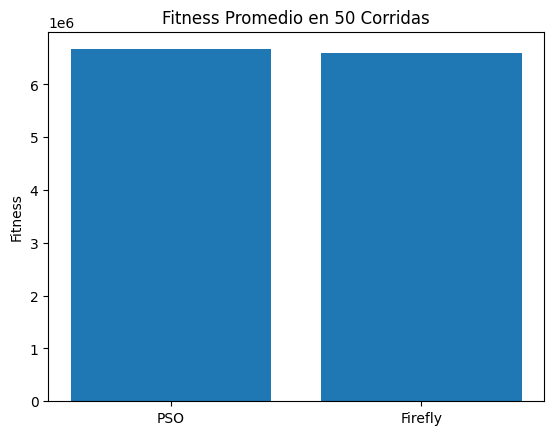

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# ------------------ main para 50 corridas independientes -----------
def main():
    #n_clientes = 100
    #margen = np.random.uniform(10, 100, n_clientes)
    #potencia = np.random.uniform(5, 50, n_clientes)
    #clientes = [f"Cliente_{i}" for i in range(n_clientes)]

    CAPACIDAD = 500
    n_runs = 50  # Numero de corridas independientes

    # Listas para almacenar resultados de cada corrida
    pso_fitness_list = []
    pso_potencia_list = []

    firefly_fitness_list = []
    firefly_potencia_list = []

    # Ahora hacemos 50 corridas independientes de cada heurística
    for run_id in range(n_runs):
        # ---- PSO ----
        best_pos_pso, best_fit_pso, best_pot_pso = run_pso(
            margen, potencia,
            n_particles=50,
            n_iterations=100,
            w=0.7, c1=1.5, c2=1.5,
            capacidad=CAPACIDAD
        )

        # ---- Firefly  ----
        best_sol_ff, best_fit_ff, best_pot_ff = run_firefly(
            margen, potencia,
            n_fireflies=50,
            n_iterations=50,
            alpha=0.2, beta0=1.0, gamma=1.0,
            capacidad=CAPACIDAD
        )

        # Guardamos el mejor de cada corrida
        pso_fitness_list.append(best_fit_pso)
        pso_potencia_list.append(best_pot_pso)

        firefly_fitness_list.append(best_fit_ff)
        firefly_potencia_list.append(best_pot_ff)

    # Construimos el DataFrame comparativo
    resultados_df = pd.DataFrame({
        'Corrida': range(1, n_runs+1),
        'PSO_Fitness': pso_fitness_list,
        'PSO_Potencia': pso_potencia_list,
        'Firefly_Fitness': firefly_fitness_list,
        'Firefly_Potencia': firefly_potencia_list
    })

    print("\n--- Resultados de las 50 Corridas ---")
    print(resultados_df.head(10))  # primeros 10

    # Guardar CSV
    resultados_df.to_csv('resultados_50_corridas.csv', index=False)
    print("Resultados guardados en 'resultados_50_corridas.csv'")

    # Describe
    print("\nResumen estadístico:")
    print(resultados_df.describe())

    # Grafica en barras el mejor fitnes.
    plt.figure()
    avg_pso = resultados_df['PSO_Fitness'].mean()
    avg_ff = resultados_df['Firefly_Fitness'].mean()
    plt.bar(['PSO', 'Firefly'], [avg_pso, avg_ff])
    plt.title("Fitness Promedio en 50 Corridas")
    plt.ylabel("Fitness")
    plt.show()

if __name__ == "__main__":
    main()


# 4) Prueba de Hipotesis

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Leer el archivo CSV
df = pd.read_csv('resultados_50_corridas.csv')
print("Primeros 5 registros del DataFrame:")
print(df.head())

# 2. Estadísticos descriptivos para PSO_Fitness y Firefly_Fitness
pso_fitness = df['PSO_Fitness']
firefly_fitness = df['Firefly_Fitness']

print("\nEstadísticos descriptivos para PSO_Fitness:")
print(pso_fitness.describe())

print("\nEstadísticos descriptivos para Firefly_Fitness:")
print(firefly_fitness.describe())

# 3. Calcular la diferencia entre PSO y Firefly para cada corrida
# Definimos: d = PSO_Fitness - Firefly_Fitness
diferencias = pso_fitness - firefly_fitness

print("\nEstadísticos descriptivos para la diferencia (PSO - Firefly):")
print(diferencias.describe())

# 4. Realizar la prueba de hipótesis pareada (t-test para muestras relacionadas)
# Hipótesis:
# H₀: μ_d ≤ 0  (PSO no es mejor que Firefly)
# H₁: μ_d > 0  (PSO es mejor que Firefly)
# Donde d = PSO_Fitness - Firefly_Fitness
t_stat, p_value_two = stats.ttest_rel(pso_fitness, firefly_fitness)

# Convertir el p-value a una prueba unidireccional (cola derecha).
if t_stat > 0:
    p_value_one = p_value_two / 2
else:
    p_value_one = 1 - p_value_two / 2

print("\nResultado de la prueba t-pareada:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (unilateral, cola derecha): {p_value_one}")

# 5. Conclusión basada en el nivel de significancia (alpha = 0.05)
alpha = 0.05

if p_value_one < alpha:
    print("\nConclusión: Se rechaza la hipótesis nula.")
    print("Los datos indican que PSO es significativamente mejor que Firefly (mayor fitness).")
else:
    print("\nConclusión: No se rechaza la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que PSO es significativamente mejor que Firefly.")

Primeros 5 registros del DataFrame:
   Corrida   PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Potencia
0        1 6,665,127.110       500.000    6,611,391.790           495.950
1        2 6,669,351.600       499.980    6,549,137.810           497.960
2        3 6,666,833.800       499.750    6,596,891.450           495.030
3        4 6,659,826.540       499.800    6,570,659.850           499.820
4        5 6,665,545.480       499.980    6,626,492.290           496.470

Estadísticos descriptivos para PSO_Fitness:
count          50.000
mean    6,665,238.846
std         3,546.632
min     6,655,609.530
25%     6,663,449.532
50%     6,665,306.100
75%     6,669,351.600
max     6,671,016.220
Name: PSO_Fitness, dtype: float64

Estadísticos descriptivos para Firefly_Fitness:
count          50.000
mean    6,599,413.431
std        31,554.216
min     6,545,405.580
25%     6,571,964.265
50%     6,595,939.040
75%     6,626,252.125
max     6,662,966.170
Name: Firefly_Fitness, dtype: float64

E

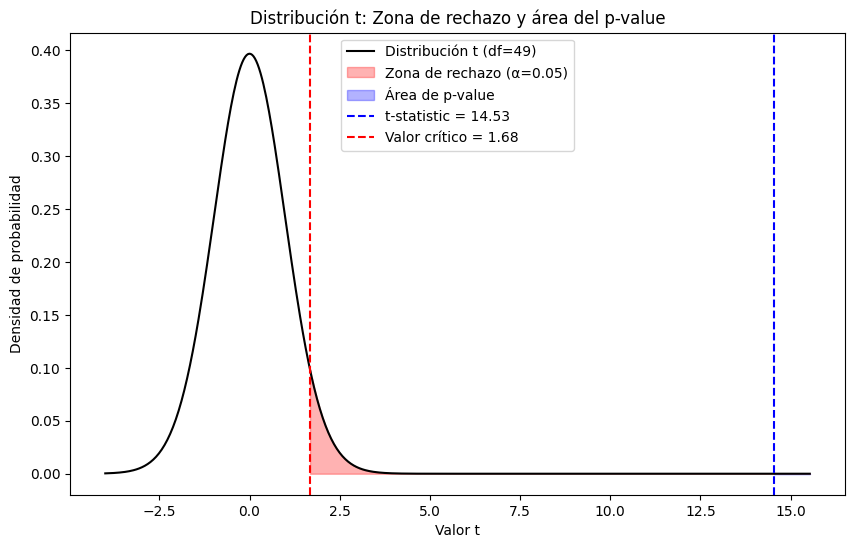

In [45]:
# 3. Definir parámetros para la gráfica
alpha = 0.05
df_grados = len(diferencias) - 1
t_crit = stats.t.ppf(1 - alpha, df_grados)

# Crear un rango para la distribución t
x_min = -4
x_max = max(t_stat, t_crit) + 1
x = np.linspace(x_min, x_max, 500)
y = stats.t.pdf(x, df_grados)

# 4. Crear la gráfica de la distribución t
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', label=f'Distribución t (df={df_grados})')

# Zona de rechazo: área a la derecha del valor crítico
x_reject = np.linspace(t_crit, x_max, 500)
y_reject = stats.t.pdf(x_reject, df_grados)
plt.fill_between(x_reject, y_reject, color='red', alpha=0.3, label=f'Zona de rechazo (α={alpha})')

# Área del p-value: área a la derecha del t_statistic
x_pvalue = np.linspace(t_stat, x_max, 500)
y_pvalue = stats.t.pdf(x_pvalue, df_grados)
plt.fill_between(x_pvalue, y_pvalue, color='blue', alpha=0.3, label='Área de p-value')

# Líneas verticales para marcar el t-statistic y el valor crítico
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-statistic = {t_stat:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', label=f'Valor crítico = {t_crit:.2f}')

plt.title('Distribución t: Zona de rechazo y área del p-value')
plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()